# Neural Networks 101 Tutorial

## 1. Basics of Artificial Neural Networks (ANNs)

Artificial Neural Networks are computing systems inspired by biological neural networks in animal brains. They consist of interconnected nodes (artificial neurons) that process and transmit information.

Key components of ANNs:
- **Neurons**: Basic processing units
- **Connections**: Links between neurons with associated weights
- **Weights**: Numeric values that determine the strength of connections
- **Biases**: Additional parameters that help neurons activate optimally
- **Activation Functions**: Non-linear functions that determine neuron output

In [21]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://towardsdatascience.com/wp-content/uploads/2021/12/1hkYlTODpjJgo32DoCOWN5w.png")

## 2. Model of Biological Neuron

Artificial neurons are inspired by biological neurons. Here's how they compare:

**Biological Neuron:**
- **Dendrites**: Receive signals from other neurons
- **Cell Body**: Processes signals
- **Axon**: Transmits signals to other neurons
- **Synapses**: Connections between neurons

**Artificial Neuron (Perceptron):**
- **Inputs**: Equivalent to dendrites (receive signals)
- **Weights**: Represent synaptic strengths
- **Summation**: Aggregates weighted inputs (cell body processing)
- **Activation Function**: Determines if neuron fires (like axon signaling)
- **Output**: Signal sent to other neurons

Let's implement a simple artificial neuron:

$ y = activationfunction(b + w1*x1 + w2*x2 + ... + wn*xn)  $

In [22]:
import numpy as np

np.random.seed(1)

class Perceptron:
    def __init__(self, input_size, activation_function):
        # Initialize weights and bias with random values
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.activation_function = activation_function
        
    def activate(self, x):
        # Compute weighted sum of inputs
        z = np.dot(x, self.weights) + self.bias
        print(z)
        print(self.weights)
        print(self.activation_function(z))
        # Apply step activation function
        #return 1 if z > 0 else 0
        return self.activation_function(z)

# Example usage
neuron = Perceptron(input_size=3, activation_function=leaky_relu)
sample_input = np.array([0.5, 0.2, 0.8])
output = neuron.activate(sample_input)
print(f"Neuron output: {output}")

-0.8056846248653293
[ 1.62434536 -0.61175641 -0.52817175]
-0.008056846248653294
Neuron output: -0.008056846248653294


## 3. Activation Functions

Activation functions introduce non-linearity into neural networks, allowing them to learn complex patterns. Common activation functions include:

In [23]:
Image(url= "https://sebastianraschka.com/images/faq/activation-functions/activation-functions.png")

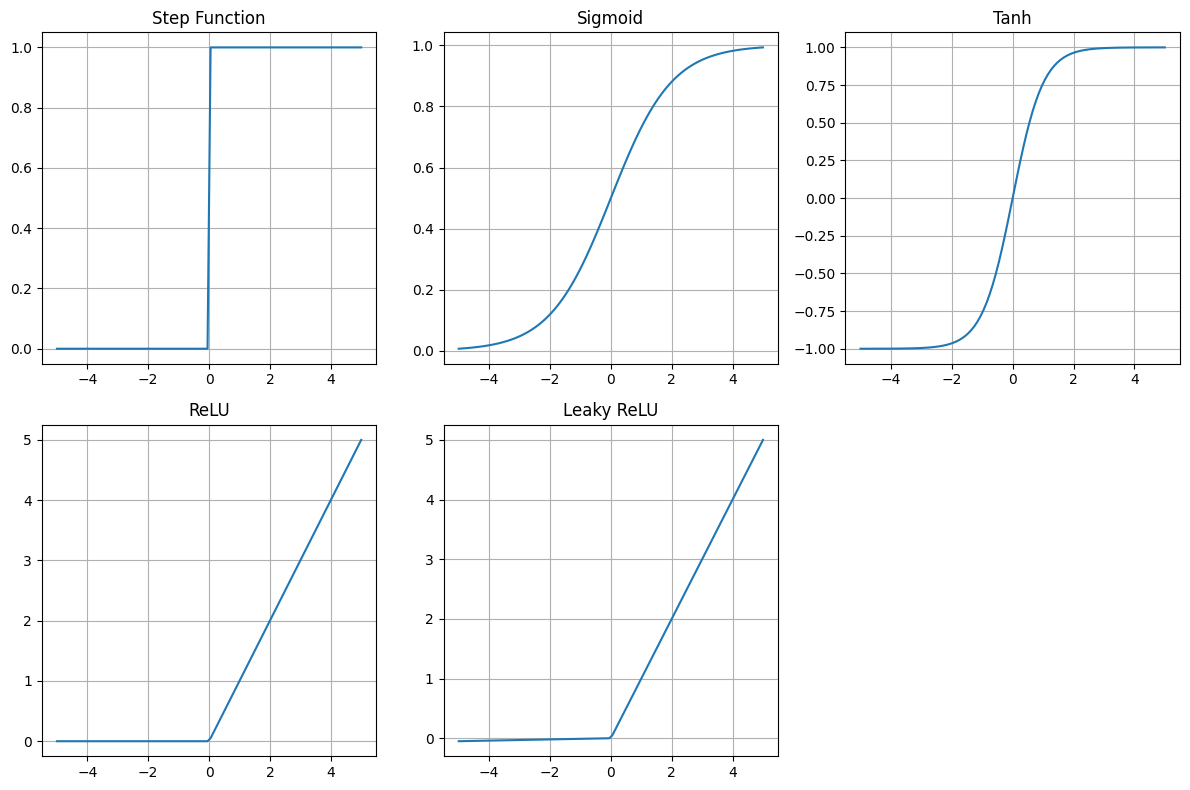

In [24]:
import matplotlib.pyplot as plt

def step(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

# Generate values for x
x = np.linspace(-5, 5, 100)

# Plot activation functions
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, step(x))
plt.title('Step Function')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, tanh(x))
plt.title('Tanh')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, relu(x))
plt.title('ReLU')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU')
plt.grid(True)

plt.tight_layout()
plt.show()

### Activation Function Characteristics

- **Step Function**: Binary output (0 or 1), not differentiable
- **Sigmoid**: Outputs between 0 and 1, smooth, suffers from vanishing gradient
- **Tanh**: Outputs between -1 and 1, zero-centered, also suffers from vanishing gradient
- **ReLU**: f(x) = max(0, x), computationally efficient, can suffer from "dying ReLU"
- **Leaky ReLU**: Modified ReLU that allows small negative values, helps with dying ReLU problem

## 4. Neural Network Architectures

Neural networks can be organized in various architectures depending on the problem they're solving.

### Feedforward Neural Network (FNN)

The simplest architecture where information flows in one direction (forward):
- Input layer
- Hidden layer(s)
- Output layer

Let's implement a simple feedforward network:

In [25]:
class FeedforwardNN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
    
    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)  # Hidden layer activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)  # Output layer activation
        return self.a2

# Example usage
nn = FeedforwardNN(input_size=3, hidden_size=4, output_size=1)
X = np.array([[0.5, 0.2, 0.8]])
output = nn.forward(X)
print(f"Network output: {output}")

Network output: [[0.50000116]]


### Other Common Architectures

- **Convolutional Neural Networks (CNNs)**: Specialized for processing grid-like data (e.g., images)
- **Recurrent Neural Networks (RNNs)**: Process sequential data with loops to persist information
- **Long Short-Term Memory (LSTM)**: Special RNN that can learn long-term dependencies
- **Transformer**: [Attention-based](https://arxiv.org/abs/1706.03762) architecture for sequence processing

In [26]:
Image(url= "https://saturncloud.io/images/blog/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way.webp")

In [27]:
Image(url= "https://media.geeksforgeeks.org/wp-content/uploads/20231204125839/What-is-Recurrent-Neural-Network-660.webp")

In [28]:
Image(url= "https://images.tpointtech.com/tutorial/tensorflow/images/long-short-term-memory-rnn-in-tensorflow.jpg")

In [29]:
Image(url= "https://www.researchgate.net/publication/333760072/figure/fig4/AS:769512475467778@1560477479835/sualization-of-Self-Attention.ppm")

## 5. Essential Linear Algebra for Neural Networks

Linear algebra is fundamental to understanding and implementing neural networks.

### Vectors and Matrices

- **Vectors**: 1D arrays (e.g., inputs, weights)
- **Matrices**: 2D arrays (e.g., weight matrices)

In [30]:
# Vector operations
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

# Addition
print("Vector addition:", v1 + v2)

# Scalar multiplication
print("Scalar multiplication:", 2 * v1)

# Dot product
print("Dot product:", np.dot(v1, v2))

Vector addition: [5 7 9]
Scalar multiplication: [2 4 6]
Dot product: 32


In [31]:
# Matrix operations
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Addition
print("Matrix addition:\n", A + B)

# Matrix multiplication
print("Matrix multiplication:\n", np.dot(A, B))

# Transpose
print("Transpose:\n", A.T)

Matrix addition:
 [[ 6  8]
 [10 12]]
Matrix multiplication:
 [[19 22]
 [43 50]]
Transpose:
 [[1 3]
 [2 4]]


### Linear Algebra in Neural Networks

- **Matrix-Vector Multiplication**: Used to compute the weighted sum of inputs
- **Matrix-Matrix Multiplication**: Used for batch processing
- **Transpose Operations**: Used in backpropagation
- **Gradients**: Used to update weights during training

In [32]:
# Example: Computing the output of a neural network layer
inputs = np.array([[0.5, 0.2, 0.8]])  # Batch of 1 input with 3 features
weights = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 3 inputs, 2 neurons
biases = np.array([[0.1, 0.2]])  # Biases for 2 neurons

# Compute the weighted sum
layer_output = np.dot(inputs, weights) + biases
print("Layer output before activation:", layer_output)

# Apply activation function
activated_output = sigmoid(layer_output)
print("Layer output after sigmoid activation:", activated_output)

Layer output before activation: [[0.43 0.98]]
Layer output after sigmoid activation: [[0.60587367 0.72710822]]


## 6. Putting It All Together: Training a Neural Network

Now that we understand the individual components, let's build and train a complete neural network. We'll implement a simple network from scratch and train it on a classification task.

### 6.1 Importing Libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# For reproducibility
np.random.seed(42)

### 6.2 Generating a Dataset

We'll use the 'make_moons' dataset, which creates two interleaving half circles.

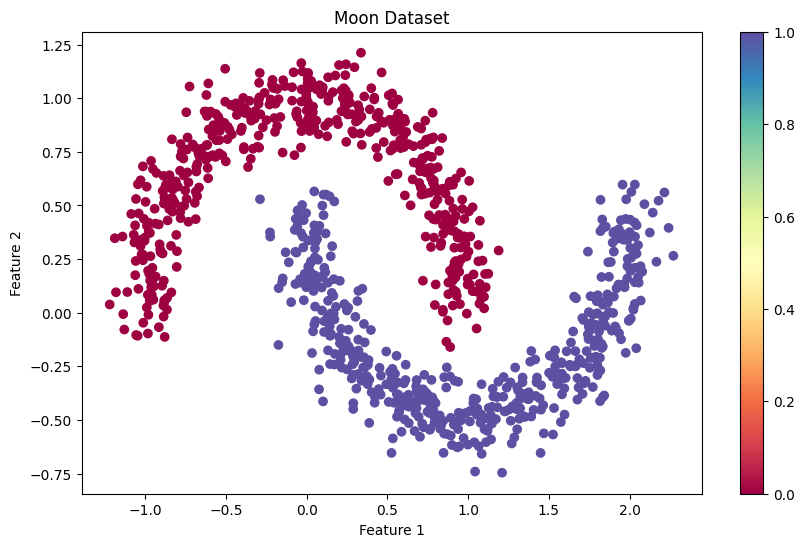

In [34]:
# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

### 6.3 Neural Network Implementation

Let's implement a neural network with one hidden layer. The new key component here is the backpropagation algorithm to make the network learn better parameters.

In [35]:
Image(url= "https://cdn.botpenguin.com/assets/website/image_347c8041fd.png")

In [36]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))
    
    def relu(self, x):
        """ReLU activation function"""
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        """Derivative of ReLU"""
        return np.where(x > 0, 1, 0)
    
    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid"""
        s = self.sigmoid(x)
        return s * (1 - s)
    
    def forward(self, X):
        """Forward propagation"""
        # First layer (input -> hidden)
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        
        # Second layer (hidden -> output)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
    
    def compute_loss(self, y_true, y_pred):
        """Binary cross-entropy loss"""
        m = y_true.shape[0]
        loss = -np.sum(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15)) / m
        return loss
    
    def backward(self, X, y):
        """Backward propagation to compute gradients"""
        m = X.shape[0]
        
        # Output layer gradients
        dz2 = self.a2 - y.reshape(-1, 1)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        # Hidden layer gradients
        dz1 = np.dot(dz2, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        return dW1, db1, dW2, db2
    
    def update_parameters(self, dW1, db1, dW2, db2, learning_rate):
        """Update weights and biases using gradient descent"""
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    def train(self, X, y, learning_rate=0.1, epochs=1000, print_every=100):
        """Train the neural network"""
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Compute loss
            loss = self.compute_loss(y.reshape(-1, 1), y_pred)
            losses.append(loss)
            
            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X, y)
            
            # Update parameters
            self.update_parameters(dW1, db1, dW2, db2, learning_rate)
            
            # Print progress
            if epoch % print_every == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        
        return losses
    
    def predict(self, X, threshold=0.5):
        """Make binary predictions"""
        y_pred = self.forward(X)
        return (y_pred >= threshold).astype(int)

### 6.4 Training the Network

In [62]:
# set hyperparameters
hidden_size = 100
learning_rate = 0.3
epochs = 2000

# Create a neural network 
nn = NeuralNetwork(input_size=2, hidden_size=hidden_size, output_size=1)

# Train the network
losses = nn.train(X_train, y_train, learning_rate=learning_rate, epochs=epochs, print_every=round(epochs/10))

Epoch 0, Loss: 0.6930
Epoch 200, Loss: 0.2535
Epoch 400, Loss: 0.2525
Epoch 600, Loss: 0.2505
Epoch 800, Loss: 0.2416
Epoch 1000, Loss: 0.2244
Epoch 1200, Loss: 0.2047
Epoch 1400, Loss: 0.1504
Epoch 1600, Loss: 0.0884
Epoch 1800, Loss: 0.0550


### 6.5 Visualizing the Training Progress

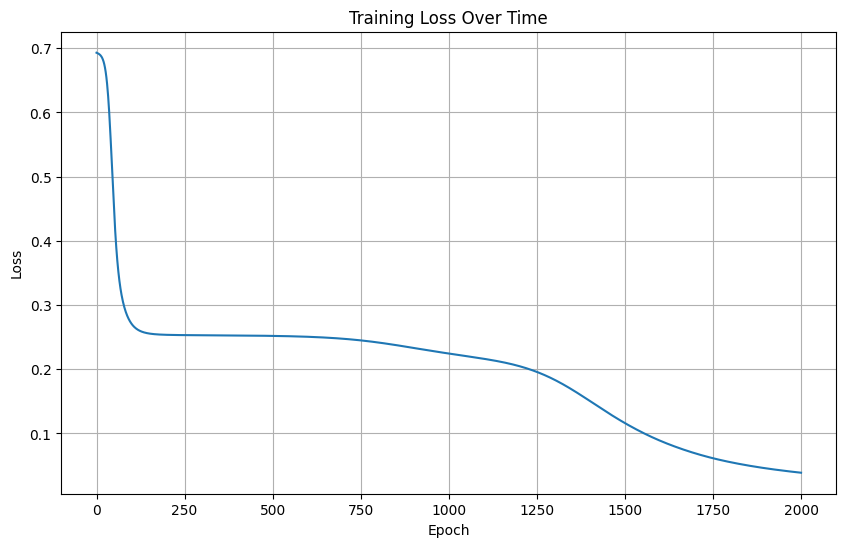

In [63]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

### 6.6 Evaluating the Model

In [64]:
# Make predictions on test set
y_pred = nn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.9950


### 6.7 Visualizing the Decision Boundary

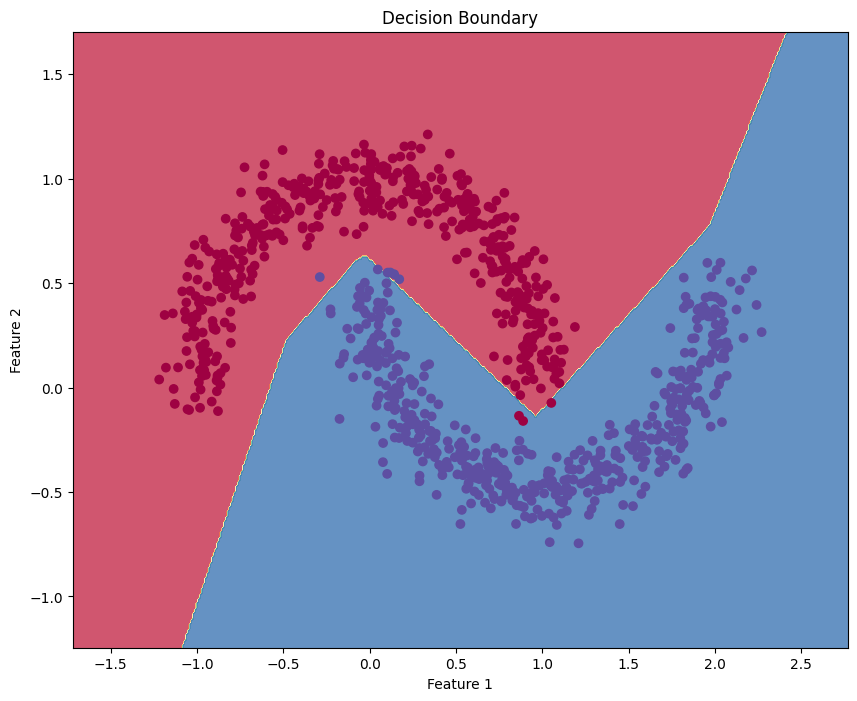

In [65]:
def plot_decision_boundary(X, y, model):
    """Plot the decision boundary of the trained model"""
    # Set min and max values with some margin
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    
    # Generate a grid of points
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Make predictions on the grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, nn)

### HOMEWORK

- Reimplement the NeuralNetwork class by using the Perceptron class inside it (e.g. a layer is an array of perceptrons)
- Inside the class extract weights and other info from the Perceptrons to allow vector-matrix efficient multiplications
- (BONUS) make everything not using matrix multiplications, but rather for loops iterating over list of Perceptrons